In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def ReadImage(image_path: str, resize: float = 1.0) -> tuple[np.ndarray,
                                                             np.ndarray]:
    # Read in image as RGB just to show
    image_rgb = Image.open(image_path)

    # Resize RGB image
    w = int(image_rgb.width * resize)
    h = int(image_rgb.height * resize)
    image_rgb = image_rgb.resize((w, h))
    display(image_rgb)
    image_rgb = np.array(image_rgb)

    # Read in image as grayscale for operations
    image = Image.open(image_path).convert('L')

    # Resize gray image
    image = image.resize((w, h))

    # Show gray image
    display(image)

    # Store as array
    image = np.array(image)

    print(f'Read in {image_path}. Shape: {image.shape}')
    width = image.shape[1]
    height = image.shape[0]
    Image.fromarray(image)

    return image, image_rgb

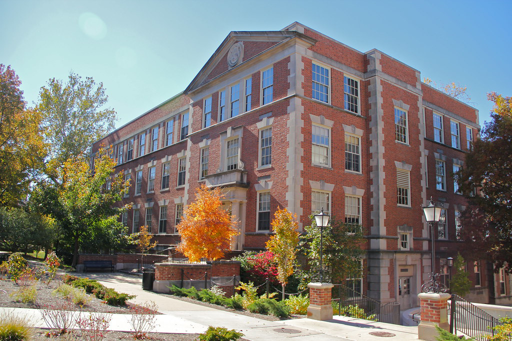

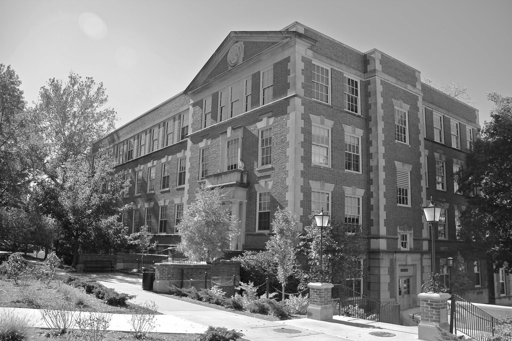

Read in building.jpg. Shape: (341, 512)


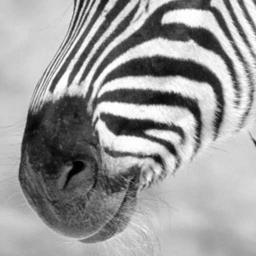

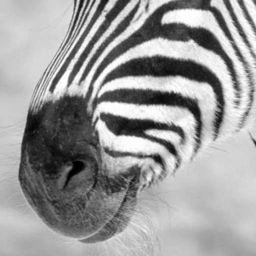

Read in zebra.jpg. Shape: (256, 256)


In [34]:
building, building_rgb = ReadImage('building.jpg', 0.5)
zebra = ReadImage('zebra.jpg', 0.5)

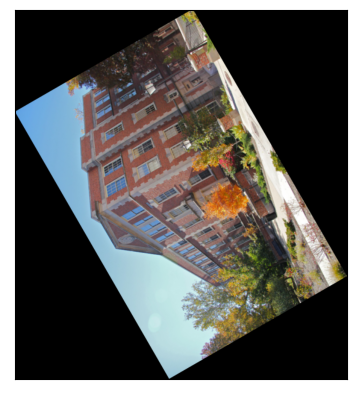

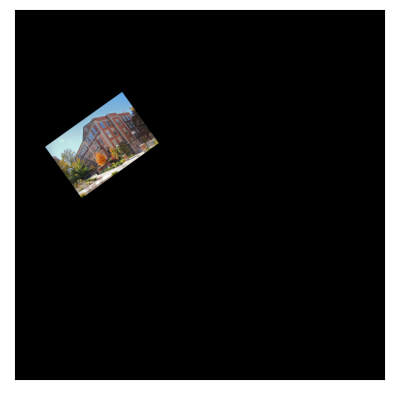

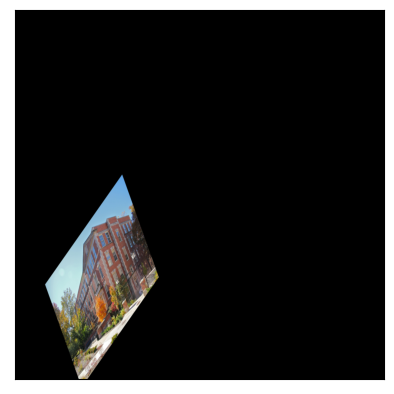

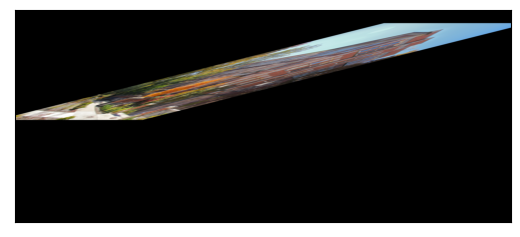

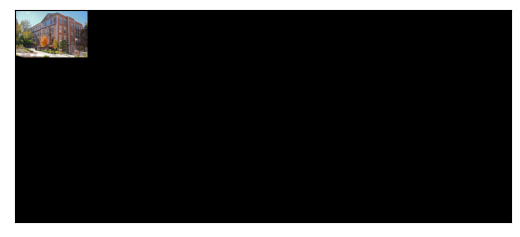

In [74]:
import skimage.transform as transform

angle = 120
scale = 2
translation = (300, -700)
shear = (2, 1)

building_rgb_rotate = transform.rotate(building_rgb, angle, True)
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(building_rgb_rotate)

tform_sim = transform.SimilarityTransform(scale=scale, rotation=angle, translation=translation)
building_rgb_sim = transform.warp(building_rgb, tform_sim, output_shape=(1000,1000))
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(building_rgb_sim)

tform_aff = transform.AffineTransform(scale=shear, rotation=angle, translation=translation)
building_rgb_aff = transform.warp(building_rgb, tform_aff, output_shape=(1000,1000))
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(building_rgb_aff)

projective_matrix = np.array([[0.5, 2, -1500],
                              [0, 0.5, -50],
                              [0, 0, 1]])
tform_pro = transform.ProjectiveTransform(projective_matrix)
building_rgb_pro = transform.warp(building_rgb, tform_pro, output_shape=(1500,3500))
building_rgb_pro_inv = transform.warp(building_rgb_pro, tform_pro.inverse)
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(building_rgb_pro)

plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(building_rgb_pro_inv)